<a href="https://colab.research.google.com/github/imaadfakier/movie-budgets-revenues/blob/main/Seaborn_and_Linear_Regression_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [ ]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [ ]:
data.shape

(5391, 6)

In [ ]:
data.isna().any()

# # We can check for NaN values with this line:
# data.isna().values.any()

Rank                     False
Release_Date             False
Movie_Title              False
USD_Production_Budget    False
USD_Worldwide_Gross      False
USD_Domestic_Gross       False
dtype: bool

In [ ]:
# data.duplicated()
data.duplicated().any()

# # And check for duplicates with this line:
# data.duplicated().values.any()

False

In [ ]:
# The fact that there are no duplicates or NaN (not-a-number) values in the 
# dataset will make our job easier. We can also see if there are null values in 
# .info(), which also shows us that we need to do some type conversion.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [ ]:
data[['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']]

,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,"$110,000","$11,000,000","$10,000,000"
1,"$385,907",$0,$0
2,"$200,000","$8,000,000","$8,000,000"
3,"$100,000","$3,000,000","$3,000,000"
4,"$245,000","$22,000,000","$11,000,000"
...,...,...,...
5386,"$15,000,000",$0,$0
5387,"$160,000,000",$0,$0
5388,"$175,000,000",$0,$0
5389,"$50,000,000",$0,$0


In [ ]:
# data[['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']].apply(lambda amount: float(amount.replace('$', '').replace(',', '')))  # not possible with a dataframe
data['USD_Production_Budget'].apply(lambda amount: pd.to_numeric(amount.replace('$', '').replace(',', '')))
data['USD_Worldwide_Gross'].apply(lambda amount: pd.to_numeric(amount.replace('$', '').replace(',', '')))
data['USD_Domestic_Gross'].apply(lambda amount: pd.to_numeric(amount.replace('$', '').replace(',', '')))

# # data[['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']].astype(str).str.replace('$', '').astype(str).str.replace(',', '')  # not possible with a dataframe
# data['USD_Production_Budget'].astype(str).str.replace('$', '').astype(str).str.replace(',', '')
# pd.to_numeric(data['USD_Production_Budget'].astype(str).str.replace('$', '').str.replace(',', ''))
# data['USD_Worldwide_Gross'].astype(str).str.replace('$', '').astype(str).str.replace(',', '')
# pd.to_numeric(data['USD_Worldwide_Gross'].astype(str).str.replace('$', '').str.replace(',', ''))
# data['USD_Domestic_Gross'].astype(str).str.replace('$', '').astype(str).str.replace(',', '')
# pd.to_numeric(data['USD_Domestic_Gross'].astype(str).str.replace('$', '').str.replace(',', ''))

0       10000000
1              0
2        8000000
3        3000000
4       11000000
          ...   
5386           0
5387           0
5388           0
5389           0
5390           0
Name: USD_Domestic_Gross, Length: 5391, dtype: int64

In [ ]:
# In order to convert the data in the budget and revenue columns and remove all 
# the non-numeric characters, we can use a nested for loop. We create two Python 
# lists: the characters to remove and the column names. Inside the nested loop 
# we can combine .replace() and .to_numeric() to achieve our goal.
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']
 
for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        data[col] = data[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    data[col] = pd.to_numeric(data[col])

data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,0,0
5387,126,12/18/2018,Aquaman,160000000,0,0
5388,96,12/31/2020,Singularity,175000000,0,0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0,0


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [ ]:
data[['Release_Date']]

,Release_Date
0,8/2/1915
1,5/9/1916
2,12/24/1916
3,9/17/1920
4,1/1/1925
...,...
5386,10/8/2018
5387,12/18/2018
5388,12/31/2020
5389,12/31/2020


In [ ]:
data['Release_Date']

0         8/2/1915
1         5/9/1916
2       12/24/1916
3        9/17/1920
4         1/1/1925
           ...    
5386     10/8/2018
5387    12/18/2018
5388    12/31/2020
5389    12/31/2020
5390    12/31/2020
Name: Release_Date, Length: 5391, dtype: object

In [ ]:
data['Release_Date'].apply(lambda date: pd.to_datetime(date))
# pd.to_datetime(data['Release_Date'])

0      1915-08-02
1      1916-05-09
2      1916-12-24
3      1920-09-17
4      1925-01-01
          ...    
5386   2018-10-08
5387   2018-12-18
5388   2020-12-31
5389   2020-12-31
5390   2020-12-31
Name: Release_Date, Length: 5391, dtype: datetime64[ns]

In [ ]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [ ]:
data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2551,1905,2005-11-11,Pride & Prejudice,28000000,126549607,38372662
249,3160,1979-06-15,Prophecy,12000000,22673340,22673340
3578,2333,2010-02-04,Why Did I Get Married Too?,20000000,60831067,60095852
4261,4073,2012-10-26,Mientras duermes,5000000,9109597,0
2469,3730,2005-07-22,The Devil's Rejects,7000000,20940428,17044981


In [ ]:
# 1.

In [ ]:
# data['USD_Production_Budget'].mean()
round(data['USD_Production_Budget'].mean(), 2)

31113737.58

In [ ]:
# 2.

In [ ]:
round(data['USD_Worldwide_Gross'].mean(), 2)

88855421.96

In [ ]:
# *3.

In [ ]:
data[['USD_Domestic_Gross', 'USD_Worldwide_Gross']].min()

USD_Domestic_Gross     0
USD_Worldwide_Gross    0
dtype: int64

In [ ]:
# *4.

In [ ]:
data.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425
4925,4,2015-06-11,Spectre,300000000,879620923,200074175
4333,6,2013-02-07,The Lone Ranger,275000000,260002115,89302115
...,...,...,...,...,...,...
1209,5387,1999-02-04,Following,6000,240495,48482
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0
2462,5388,2005-07-13,Return to the Land of Wonders,5000,1338,1338
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0


In [ ]:
df_size = len(data)
df_size

5391

In [ ]:
# twenty_five_percent_records_amount = df_size * 0.25
import math
twenty_five_percent_records_amount = math.floor(df_size * 0.25)
twenty_five_percent_records_amount

1347

In [ ]:
data.sort_values('USD_Production_Budget', ascending=False).tail(twenty_five_percent_records_amount)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3161,4039,2008-06-08,Bottle Shock,5000000,4815890,4078607
2227,4023,2004-05-28,Saved!,5000000,10206551,8886160
323,4011,1982-02-04,Diner,5000000,12592907,12592907
3664,4029,2010-05-28,Sea Rex 3D: Journey to a Prehistoric World,5000000,16515203,6096582
2374,4070,2005-01-28,Fascination,5000000,83356,16670
...,...,...,...,...,...,...
1209,5387,1999-02-04,Following,6000,240495,48482
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0
2462,5388,2005-07-13,Return to the Land of Wonders,5000,1338,1338
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0


In [ ]:
# 5.

In [ ]:
data.loc[data['USD_Production_Budget'].idxmax()]

Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross                 760507625
Name: 3529, dtype: object

In [ ]:
data.loc[data['USD_Worldwide_Gross'].idxmax()]

Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross                 760507625
Name: 3529, dtype: object

In [ ]:
# 6.

In [ ]:
data['USD_Domestic_Gross'][data['USD_Production_Budget'].idxmax()]

760507625

In [ ]:
data['USD_Domestic_Gross'][data['USD_Production_Budget'].idxmin()]

181041

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [ ]:
data[data['USD_Domestic_Gross'] == 0].count()

Rank                     512
Release_Date             512
Movie_Title              512
USD_Production_Budget    512
USD_Worldwide_Gross      512
USD_Domestic_Gross       512
dtype: int64

In [ ]:
data.sort_values('USD_Production_Budget', ascending=False)[(data.sort_values('USD_Production_Budget', ascending=False)['USD_Domestic_Gross'] == 0)].head(25)
# data.sort_values('USD_Production_Budget', ascending=False)[
#                                                            (data.sort_values('USD_Production_Budget', ascending=False)['USD_Worldwide_Gross'] == 0) |
#                                                            (data.sort_values('USD_Production_Budget', ascending=False)['USD_Domestic_Gross'] == 0)
#                                                            ].head(25)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
4295,1230,2012-12-31,Foodfight!,45000000,73706,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [ ]:
data.sort_values('USD_Production_Budget', ascending=False)[(data.sort_values('USD_Production_Budget', ascending=False)['USD_Worldwide_Gross'] == 0)].count()

Rank                     357
Release_Date             357
Movie_Title              357
USD_Production_Budget    357
USD_Worldwide_Gross      357
USD_Domestic_Gross       357
dtype: int64

In [ ]:
# data.sort_values('USD_Production_Budget', ascending=False)[(data.sort_values('USD_Production_Budget', ascending=False)['USD_Worldwide_Gross'] == 0)].head(25)
data.sort_values('USD_Production_Budget', ascending=False)[(data.sort_values('USD_Production_Budget', ascending=False)['USD_Worldwide_Gross'] == 0)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [ ]:
# ---

In [ ]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [ ]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 domestically 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [ ]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f'Number of films that grossed $0 worldwide {len(zero_worldwide)}')
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 worldwide 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [ ]:
# So far, we've created subsets for our DataFrames based on a single condition. 
# But what if we want to select our data based on more than one condition? For 
# example, which films made money internationally (i.e. data.USD_Worldwide_Gross 
# != 0), but had zero box office revenue in the United States (i.e. 
# data.USD_Domestic_Gross == 0)?

# How would we create a filter for these two conditions? One approach is to use 
# the .loc[] property combined with the bitwise and & operator.
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
                                  (data.USD_Worldwide_Gross != 0)]  # <--- learned something new
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


In [ ]:
# Why does this work? Pandas is built on top of NumPy, which uses Python's 
# bitwise operators. And these bitwise operators allow us to do comparisons on 
# an element by element basis in both NumPy and Pandas! Here's an example:
bool_list1 = [True, True, False, True]
bool_list2 = [False, True, False, True]
np.array(bool_list1) & np.array(bool_list2)

array([False,  True, False,  True])

In [ ]:
# However, we're also checking if the domestic revenue was zero and the 
# worldwide revenue was not zero. Because the bitwise operator takes precedence, 
# we need to include parentheses () around the comparisons we'd like to 
# prioritise.

In [ ]:
# However, this is not the only technique we can use to make multiple 
# comparisons.

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [ ]:
data.query('(USD_Domestic_Gross == 0) and (USD_Worldwide_Gross != 0)')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


In [ ]:
# In this case, we enclose the entire query inside a string.
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [ ]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [ ]:
data.sample(11)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2084,4024,2003-09-05,Les invasions barbares,5000000,25913869,8460000
213,4661,1976-11-16,Carrie,1800000,25878153,25878153
4594,5123,2014-04-25,Blue Ruin,420000,435168,258384
3894,3770,2011-05-13,Hesher,7000000,382946,382946
2813,1916,2006-12-05,Just My Luck,28000000,38159905,17326650
1587,1990,2001-03-08,Original Sin,26000000,16521410,16521410
2218,795,2004-05-03,Starsky & Hutch,60000000,170200225,88200225
3291,972,2008-12-19,Seven Pounds,54000000,166617328,69951824
4193,2655,2012-07-13,Red Lights,17700000,14518884,49521
4210,4094,2012-08-17,The Awakening,4900000,6924321,95933


In [ ]:
data[data['Release_Date'] >= scrape_date]
# data.query('Release_Date >= scrape_date')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [ ]:
data.loc[(data['USD_Domestic_Gross'] > 0) & (data['USD_Worldwide_Gross'] == 0)]
data.query("USD_Domestic_Gross > 0 and USD_Worldwide_Gross == 0")

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross


In [ ]:
data_clean = data[data['Release_Date'] <= scrape_date]

In [ ]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [ ]:
data_clean.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343
5383,2521,2017-12-31,The Thousand Miles,20000000,0,0


In [ ]:
# ---

In [ ]:
# From this point on, we'll work with another DataFrame called data_clean that 
# does not include these films.
future_releases = data[data['Release_Date'] >= scrape_date]

data_clean = data.drop(future_releases.index)

In [ ]:
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [ ]:
# data_clean.describe()

In [ ]:
# data_clean[data_clean['USD_Worldwide_Gross'] < data_clean['USD_Production_Budget']]
# data_clean.loc[data_clean['USD_Worldwide_Gross'] < data_clean['USD_Production_Budget']]
data_clean.query('USD_Worldwide_Gross < USD_Production_Budget')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
...,...,...,...,...,...,...
5371,4901,2017-07-28,An Inconvenient Sequel,1000000,130874,130874
5373,2161,2017-08-25,Tulip Fever,25000000,0,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066


In [ ]:
data_clean.query('USD_Worldwide_Gross < USD_Production_Budget').count()

Rank                     2007
Release_Date             2007
Movie_Title              2007
USD_Production_Budget    2007
USD_Worldwide_Gross      2007
USD_Domestic_Gross       2007
dtype: int64

In [ ]:
data_clean.query('USD_Worldwide_Gross < USD_Production_Budget').count() / len(data_clean)

Rank                    0.37
Release_Date            0.37
Movie_Title             0.37
USD_Production_Budget   0.37
USD_Worldwide_Gross     0.37
USD_Domestic_Gross      0.37
dtype: float64

In [ ]:
(data_clean.query('USD_Worldwide_Gross < USD_Production_Budget').count() / len(data_clean)) * 100

Rank                    37.28
Release_Date            37.28
Movie_Title             37.28
USD_Production_Budget   37.28
USD_Worldwide_Gross     37.28
USD_Domestic_Gross      37.28
dtype: float64

In [ ]:
# round(data_clean.query('USD_Worldwide_Gross < USD_Production_Budget').count() / len(data_clean) * 100, 0)

In [ ]:
# ---

In [ ]:
# Again, there are different ways you could have calculated this. For example, 
# using the .loc[] property,
money_losing = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
len(money_losing)/len(data_clean)  # <--- learned something new

0.37277117384843983

In [ ]:
# or the .query() function
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
money_losing.shape[0]/data_clean.shape[0]  # <--- learned something new

0.37277117384843983

In [ ]:
# In both cases, we see that a whopping 37.2% 😮 of films do not recoup their 
# production budget at the box office. 💸💸💸 Who knew that film finance could 
# be so risky! 😬

# Seaborn for Data Viz: Bubble Charts

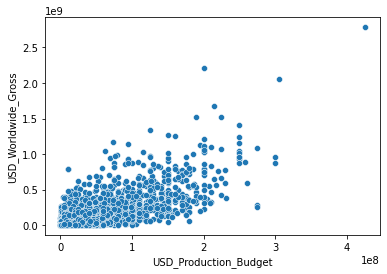

In [ ]:
# To create a .scatterplot(), all we need to do is supply our DataFrame and the 
# column names that we'd like to see on our axes.
sns.scatterplot(
    data=data_clean, 
    x='USD_Production_Budget', 
    y='USD_Worldwide_Gross'
)

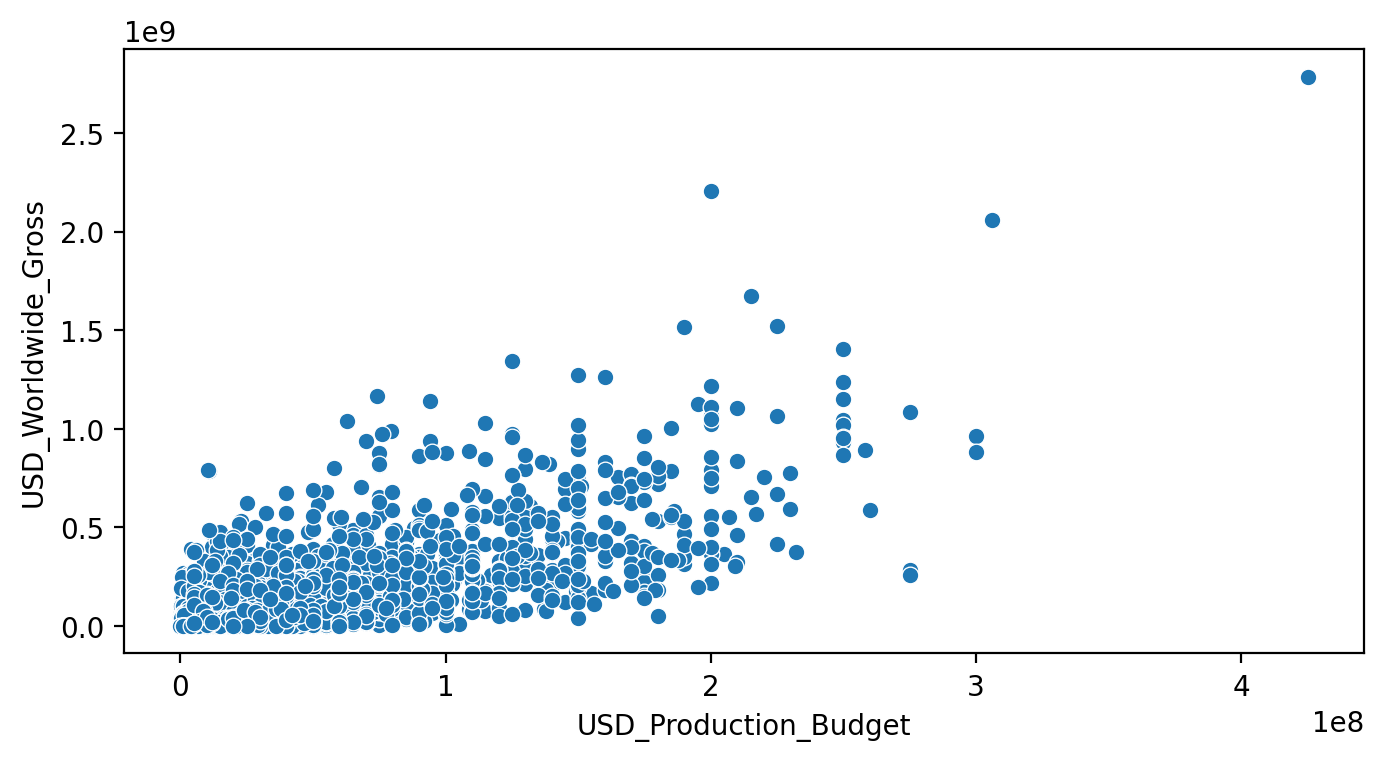

In [ ]:
# That should look familiar. 😊 Because Seaborn is built on top of Matplotlib, 
# we can dive into the Matplotlib layer anytime to configure our chart. For 
# example, we can increase the size of our figure:
plt.figure(figsize=(8, 4), dpi=200)

sns.scatterplot(
    data=data_clean, 
    x='USD_Production_Budget', 
    y='USD_Worldwide_Gross'
)

plt.show()

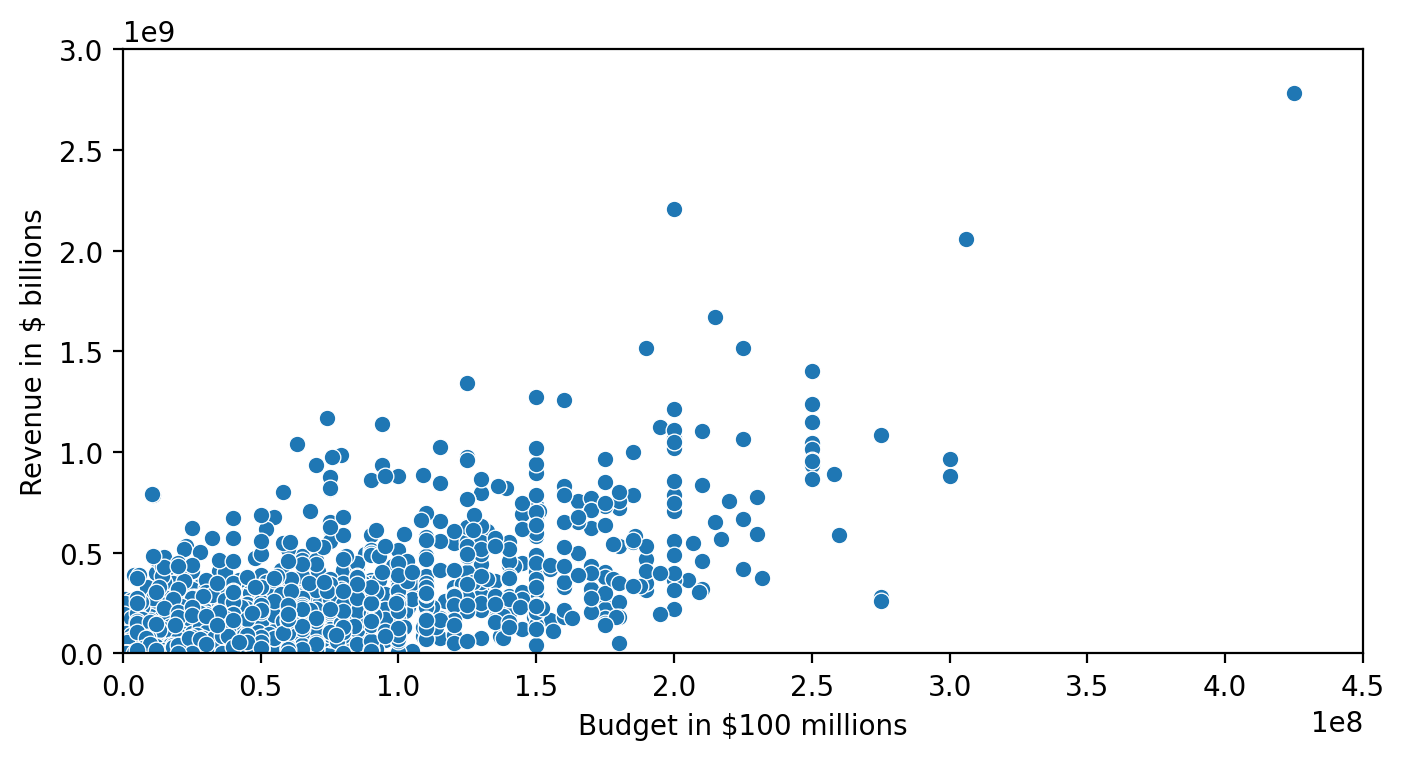

In [ ]:
# And to style our chart we can simply configure the Axes object that is 
# returned from sns.scatterplot().

# Here's how:
plt.figure(figsize=(8, 4), dpi=200)

ax = sns.scatterplot(
    data=data_clean, 
    x='USD_Production_Budget', 
    y='USD_Worldwide_Gross'
)

# Here we're diving into the Matplotb layer to set the limits on the axes and 
# change the labels. 
ax.set(
    ylim=(0, 3000000000), 
    xlim=(0, 450000000), 
    ylabel='Revenue in $ billions', 
    xlabel='Budget in $100 millions'
)

plt.show()

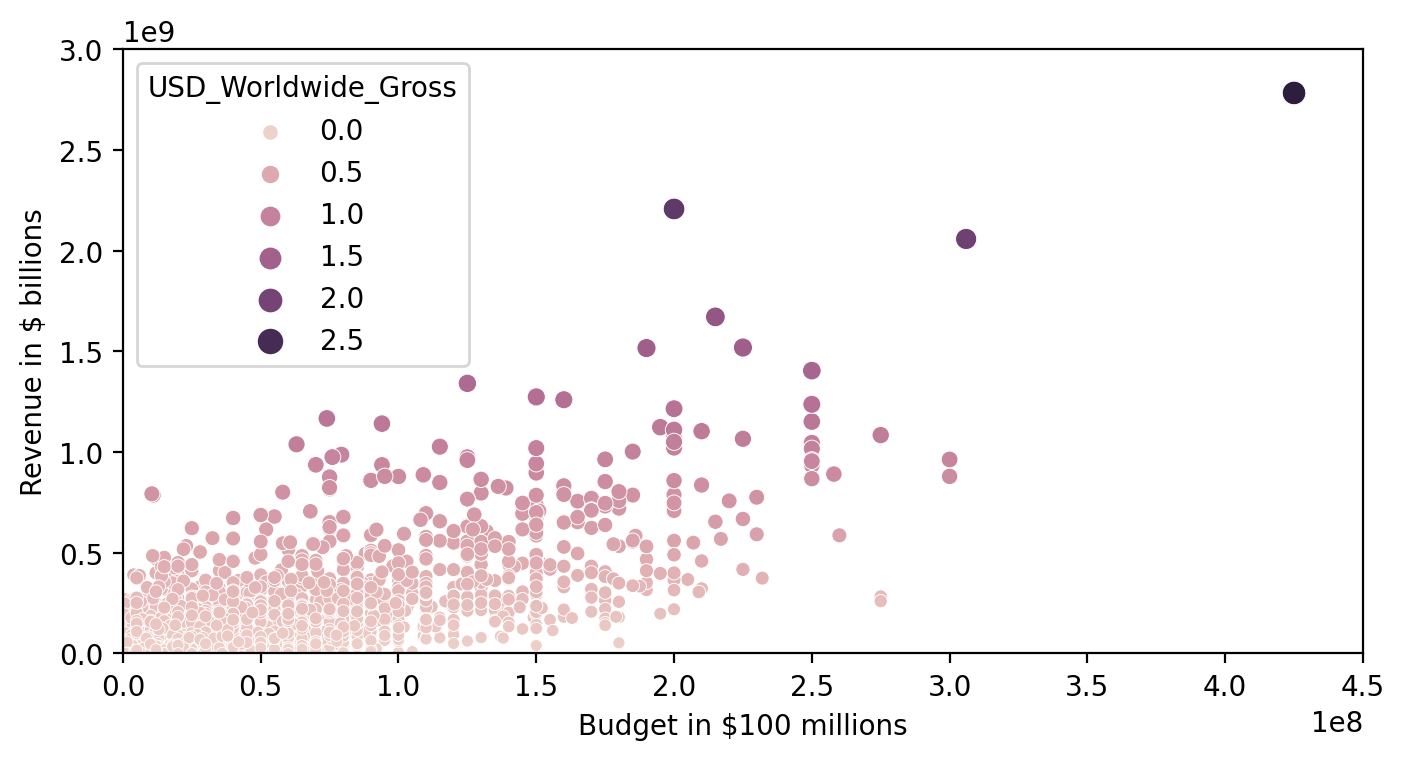

In [ ]:
# From Scatter Plot to Bubble Chart

# But the reason we're using Seaborn is because of the hue and size parameters 
# that make it very easy to create a bubble chart. These parameters allow us to 
# colour the data and change their size according to one of the columns in our 
# DataFrame.
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(
    data=data_clean, 
    x='USD_Production_Budget', 
    y='USD_Worldwide_Gross', 
    hue='USD_Worldwide_Gross',  # color 
    size='USD_Worldwide_Gross',  # dot size
)

ax.set(
    ylim=(0, 3000000000), 
    xlim=(0, 450000000), 
    ylabel='Revenue in $ billions', 
    xlabel='Budget in $100 millions',
)
 
plt.show()

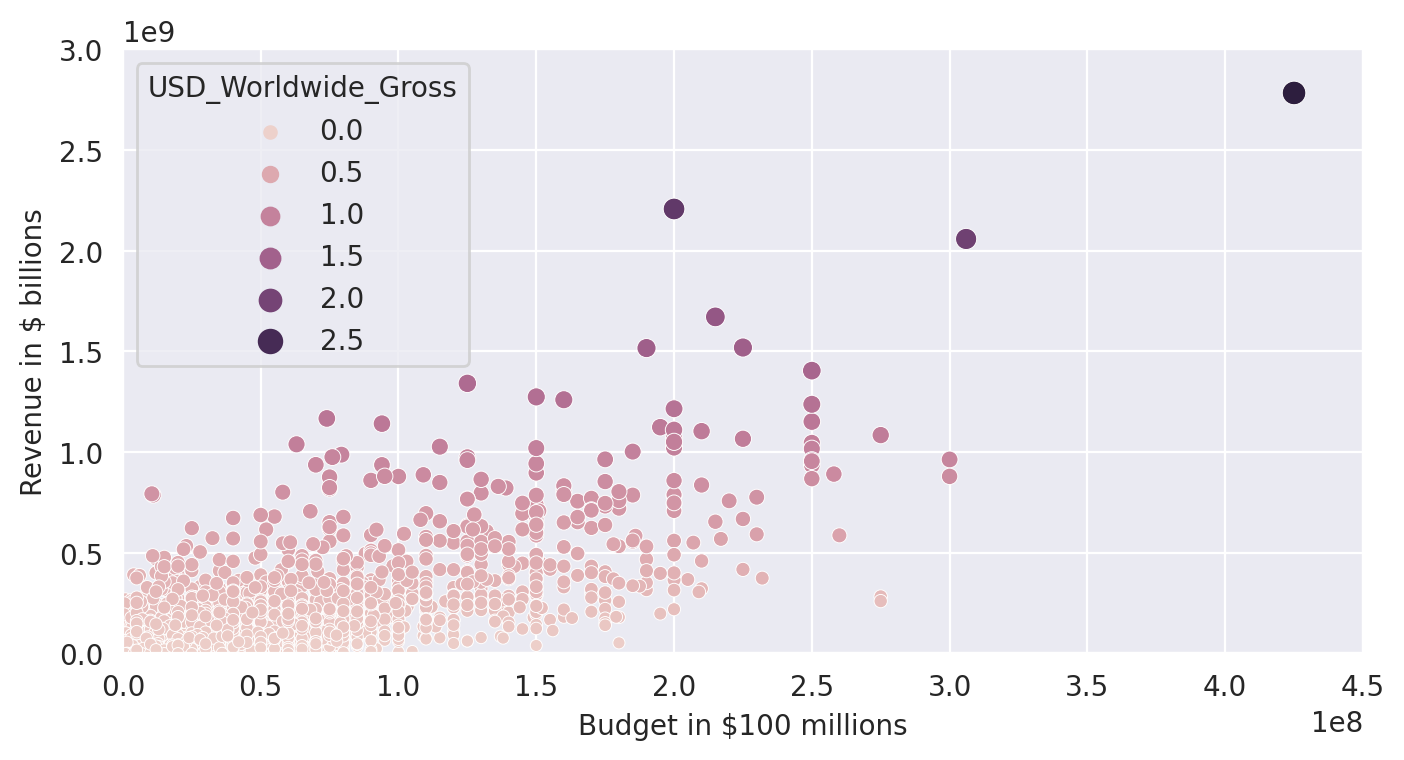

In [ ]:
# Now our higher grossing movies are bigger and darker on our chart. That's 
# super handy. But Seaborn offers a number of convenient styling options as 
# well.

# To set the styling on a single chart (as opposed to all the charts in the 
# entire notebook) we can use Python's with keyword. We've seen with used 
# already when it comes to opening files in previous lessons.
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
# with sns.axes_style('dark'):
# with sns.axes_style('whitegrid'):
# with sns.axes_style('ticks'):
  ax = sns.scatterplot(
      data=data_clean, 
      x='USD_Production_Budget', 
      y='USD_Worldwide_Gross', 
      hue='USD_Worldwide_Gross', 
      size='USD_Worldwide_Gross'
  )

  ax.set(
      ylim=(0, 3000000000), 
      xlim=(0, 450000000), 
      ylabel='Revenue in $ billions', 
      xlabel='Budget in $100 millions'
  )
  
  # plt.show()

# plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



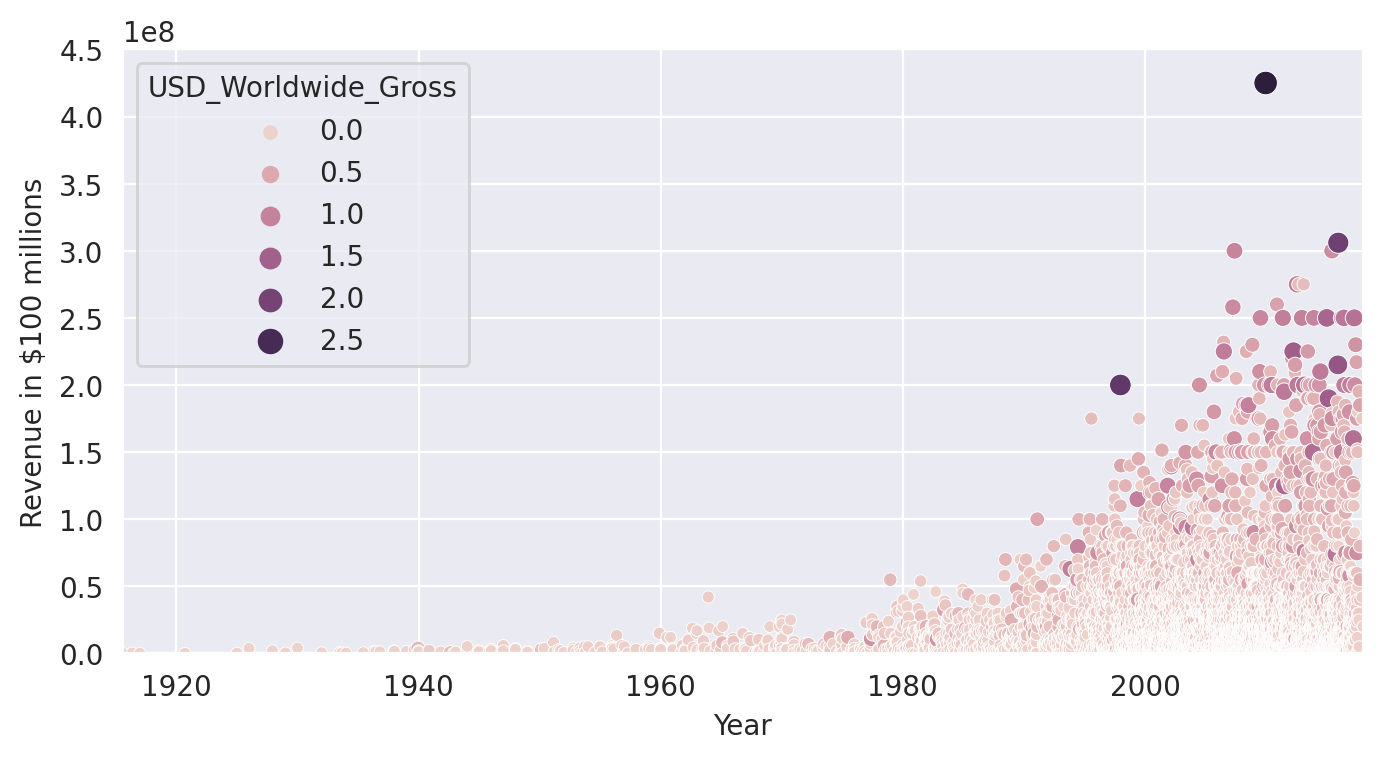

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(
      data=data_clean, 
      x='Release_Date', 
      y='USD_Production_Budget', 
      hue='USD_Worldwide_Gross', 
      size='USD_Worldwide_Gross'
  )

  ax.set(
      # xlim=(0, pd.to_timestamp('2018-01-01')), 
      xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),  # <--- learned something new
      ylim=(0, 450000000), 
      xlabel='Year', 
      ylabel='Revenue in $100 millions', 
  )
  
  # plt.show()

# plt.show()

In [ ]:
# ---

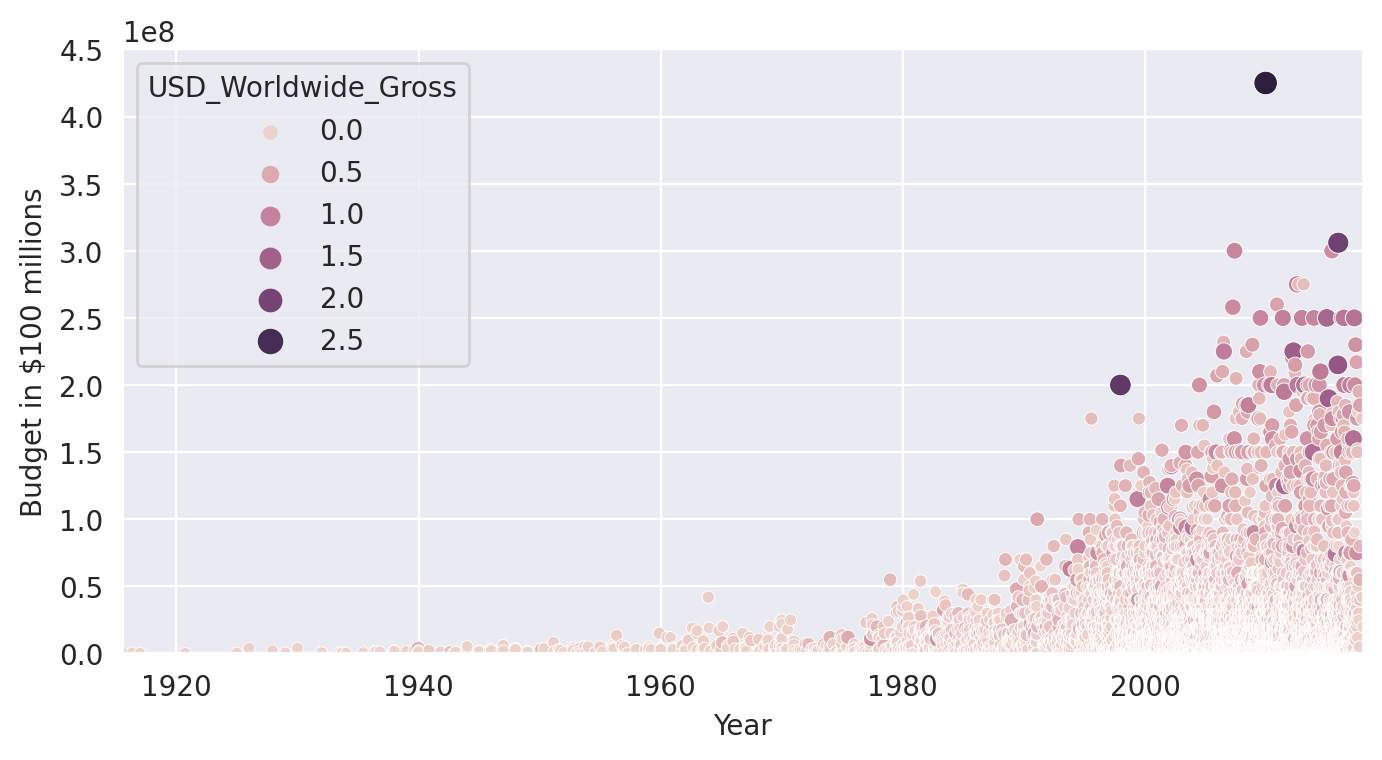

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

In [ ]:
# What do we see here? What is this chart telling us? Well, first off, movie 
# budgets have just exploded in the last 40 years or so. Up until the 1970s, the 
# film industry appears to have been in an entirely different era. Budgets 
# started growing fast from the 1980s onwards and continued to grow through the 
# 2000s. Also, the industry has grown massively, producing many more films than 
# before. The number of data points is so dense from 2000 onwards that they are 
# overlapping.

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [ ]:
data_clean.sample(7)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3795,51,2010-12-17,Tron: Legacy,200000000,400062763,172062763
1900,3962,2002-10-25,Jackass: The Movie,5000000,79282312,64282312
2435,5052,2005-05-13,Mad Hot Ballroom,500000,9387581,8117961
1056,621,1998-02-13,Sphere,73000000,50168294,37068294
2565,2909,2005-12-14,Los tres entierros de Melquiades Estrada,15000000,13454474,5027684
2391,2084,2005-03-18,Ice Princess,25000000,25732334,24381334
3361,2455,2009-04-12,Everybody's Fine,20000000,9208876,9208876


In [ ]:
datetime_index_obj = pd.DatetimeIndex(data_clean['Release_Date'])

In [ ]:
datetime_index_obj.year

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)

In [ ]:
type(datetime_index_obj.year)

pandas.core.indexes.numeric.Int64Index

In [ ]:
(datetime_index_obj.year // 10) * 10

Int64Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
            ...
            2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
           dtype='int64', name='Release_Date', length=5384)

In [ ]:
data_clean['Decade'] = (datetime_index_obj.year // 10) * 10

In [ ]:
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [ ]:
# old_films = data_clean[data_clean['Decade'] <= 1969]
old_films = data_clean[data_clean['Decade'] <= 1960]

In [ ]:
old_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


In [ ]:
old_films.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
149,3831,1969-10-24,Butch Cassidy and the Sundance Kid,6000000,102308900,102308900,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
151,3613,1969-12-18,On Her Majesty's Secret Service,8000000,82000000,22800000,1960
152,4195,1969-12-19,Topaz,4000000,6000000,6000000,1960


In [ ]:
old_films.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
137,4667,1968-03-08,Hang 'em High,1800000,6800000,6800000,1960
111,4664,1964-01-29,Dr. Strangelove,1800000,9164370,9164370,1960
83,4440,1959-03-29,Some Like it Hot,2883848,25000000,25000000,1950
81,4016,1959-01-01,Solomon and Sheba,5000000,11000000,11000000,1950
104,4478,1963-05-29,Hud,2500000,10000000,10000000,1960


In [ ]:
# How many of our films were released prior to 1970?
len(old_films)

153

In [ ]:
# What was the most expensive film made prior to 1970?
old_films.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
...,...,...,...,...,...,...,...
147,5228,1969-07-25,The Stewardesses,200000,25000000,13500000,1960
29,5283,1942-11-16,Cat People,134000,8000000,4000000,1940
135,5292,1968-01-10,Night of the Living Dead,114000,30000000,12000000,1960
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910


In [ ]:
# new_films = data_clean[data_clean['Decade'] > 1970]  # wrong!
new_films = data_clean[data_clean['Decade'] > 1960]

In [ ]:
new_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
153,2159,1970-01-01,Waterloo,25000000,0,0,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,1970


In [ ]:
new_films.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010
5383,2521,2017-12-31,The Thousand Miles,20000000,0,0,2010


In [ ]:
new_films.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
4145,1651,2012-04-27,Safe,33000000,41495213,17142080,2010
4464,3620,2013-09-18,Enough Said,8000000,25621449,17550872,2010
693,4380,1993-09-24,Warlock: The Armageddon,3000000,3902679,3902679,1990
2167,3037,2004-01-23,The Butterfly Effect,13000000,95638592,57924679,2000
953,1997,1997-02-21,Blood and Wine,26000000,1083350,1083350,1990


In [ ]:
# ---

In [ ]:
# The cut-off for our calculation is 1960 in the Decade column because this will 
# still include 1969. When we inspect our old_films DataFrame we see that it 
# only includes 153 films. As we saw in the bubble chart, the bulk of films in 
# the dataset have been released in the last 30 years.

In [ ]:
# The most expensive film prior to 1970 was Cleopatra, with a production budget 
# of $42 million. That's some serious 1960s money, and judging by the trailer, a 
# lot of it went into extravagant costumes, set design, and plenty of extras. 
# Impressive.

# Seaborn Regression Plots

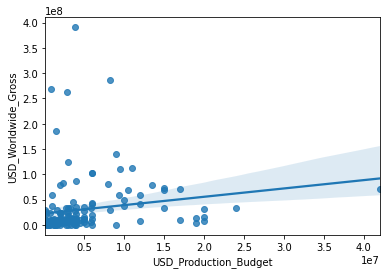

In [ ]:
# Let's visualise the relationship between the movie budget and the worldwide 
# revenue using linear regression. Seaborn makes this incredibly easy with the 
# .regplot() function.
sns.regplot(
    data=old_films, 
    x='USD_Production_Budget', 
    y='USD_Worldwide_Gross'
)
plt.show()

In [ ]:
# This creates a scatter plot and draws a linear regression line together with 
# the confidence interval at the same time.

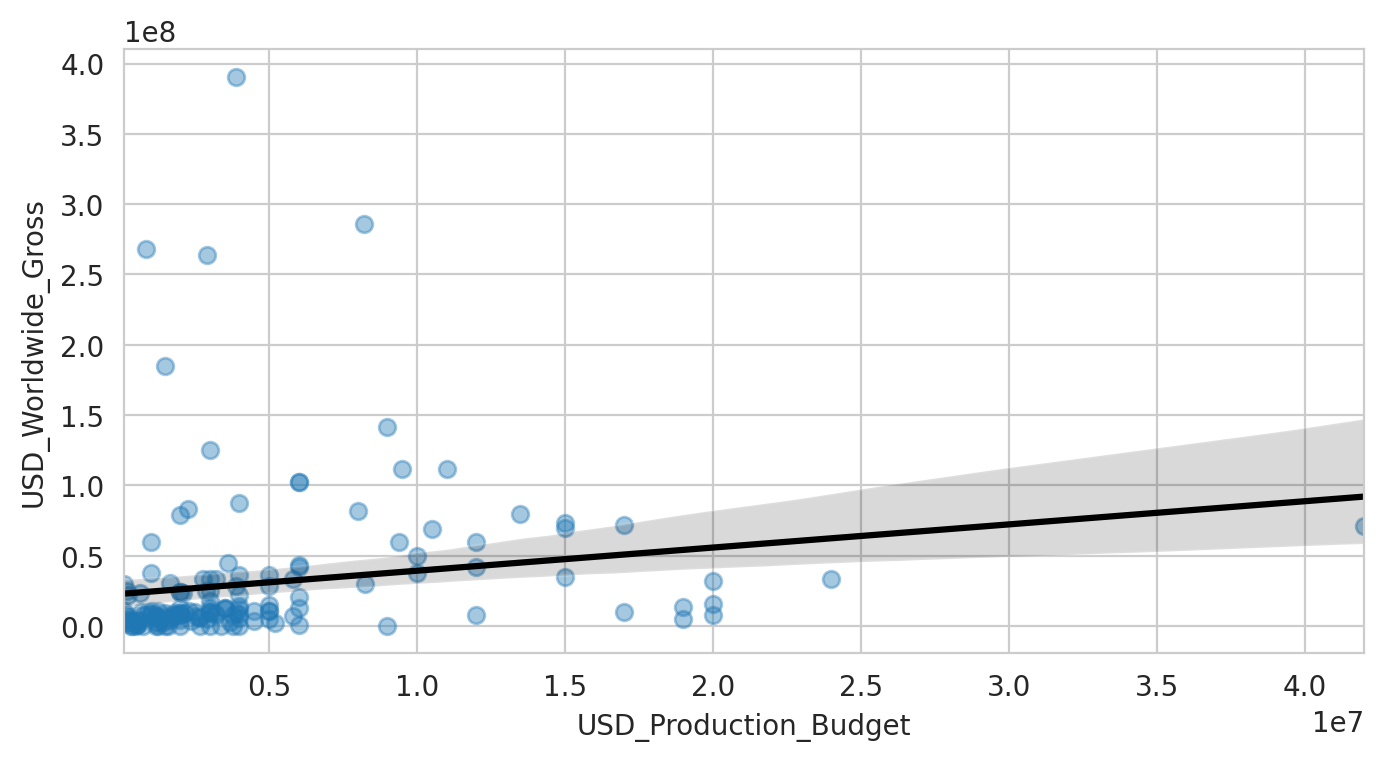

In [ ]:
# To style the chart further, we can once again, drop into the Matplotlib layer 
# and supply keyword arguments as dictionaries. We can customise the scatter 
# plot (e.g., by changing the transparency of the dots) and the regression line 
# itself (e.g., by changing the colour).
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("whitegrid"):
  sns.regplot(
      data=old_films, 
      x='USD_Production_Budget', 
      y='USD_Worldwide_Gross', 
      scatter_kws = {'alpha': 0.4}, 
      line_kws = {'color': 'black'}
  )

In [ ]:
# What do we see here? Well, first off we can spot Cleopatra on the far right. 
# But also, we see that many lower budget films made much more money! The 
# relationship between the production budget and movie revenue is not very 
# strong. Many points on the left are very far away for the line, so the line 
# appears not to capture the relationship between budget and revenue very well 
# at all!

# But does the same hold true for the newer films?

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

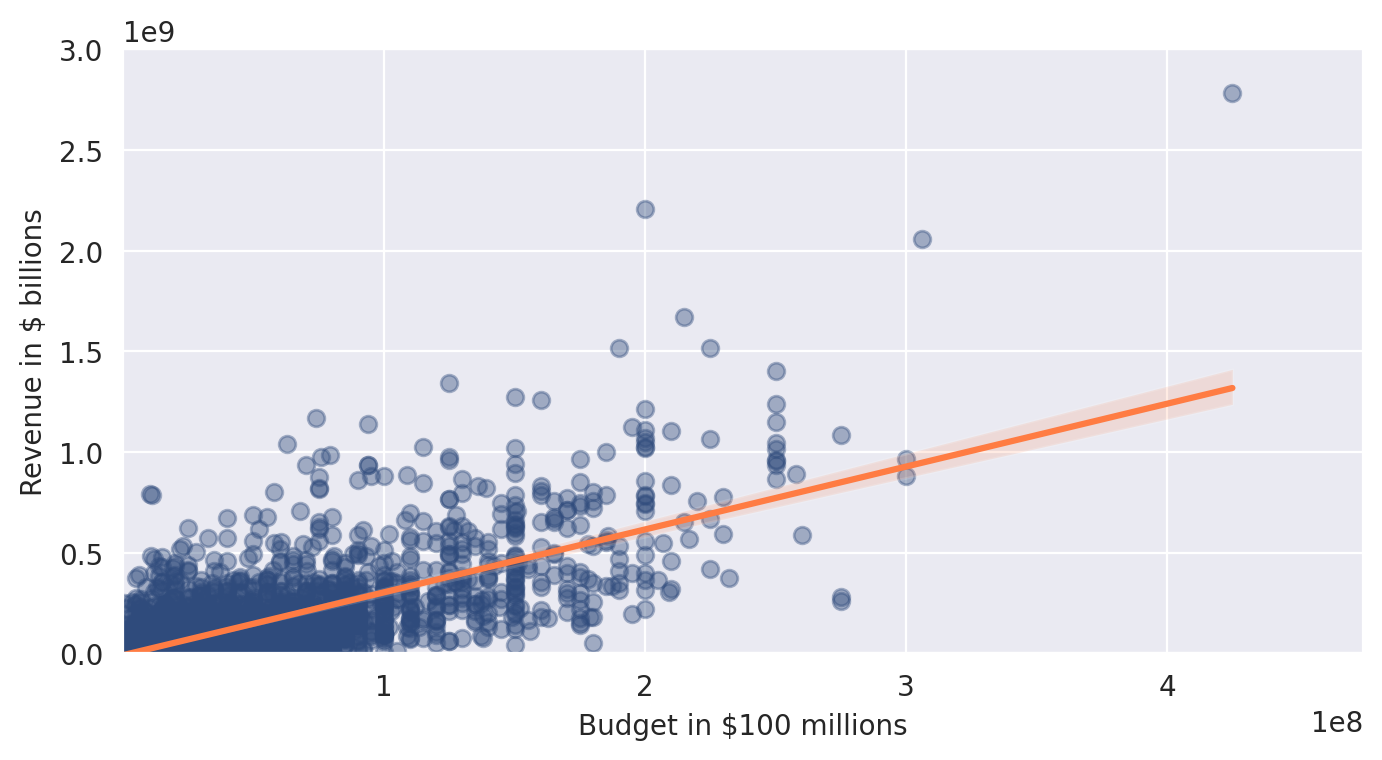

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.regplot(
        data=new_films, 
        x='USD_Production_Budget', 
        y='USD_Worldwide_Gross', 
        scatter_kws = {'color': '#2F4B7C', 'alpha': 0.4}, 
        line_kws = {'color': '#FF7C43'}
    )
 
    ax.set(
        ylim=(0, 3000000000), 
        xlim=(data_clean['USD_Production_Budget'].min(), (data_clean.USD_Production_Budget.max() + 50000000)), 
        xlabel='Budget in $100 millions', 
        ylabel='Revenue in $ billions'
    )

In [ ]:
# ---

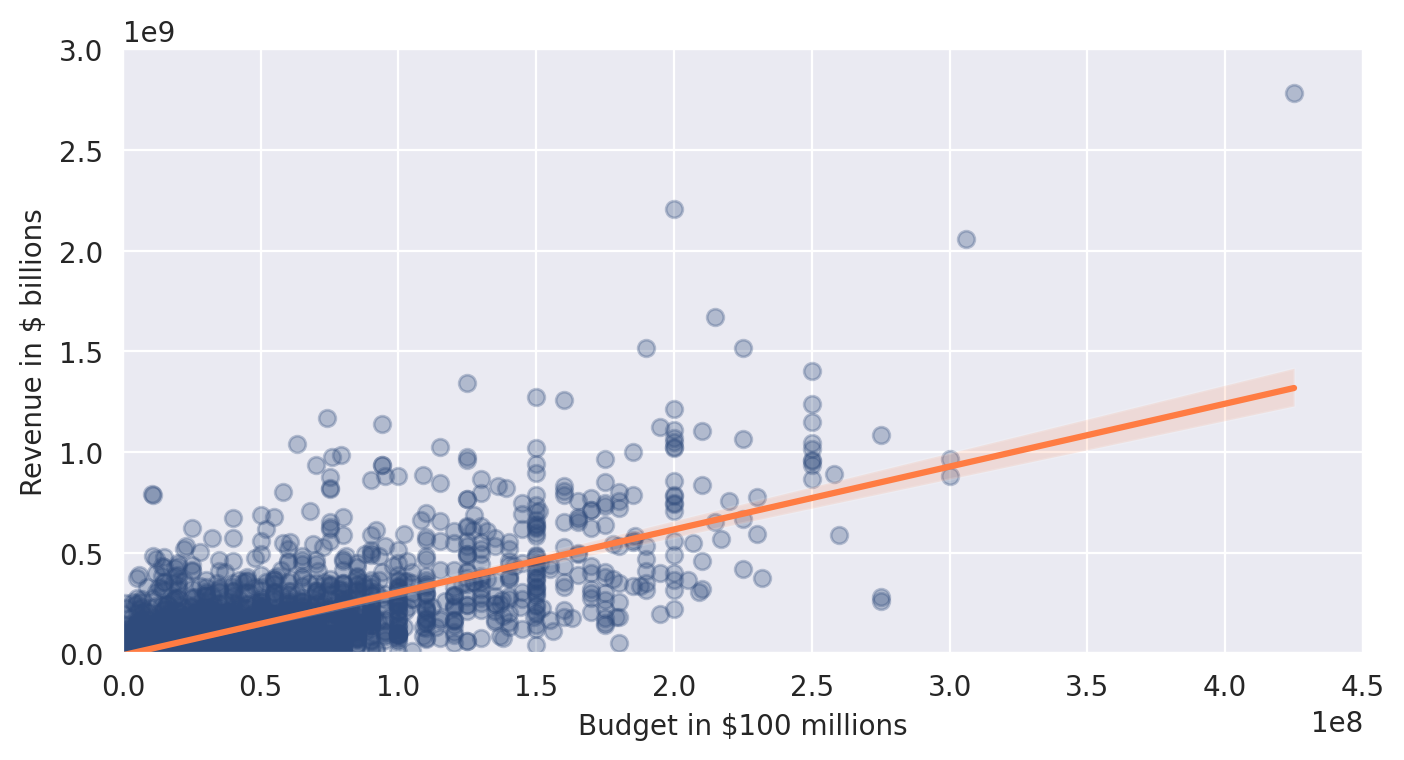

In [ ]:
# To style the chart we can use the same techniques as before: providing values 
# for the .regplot() function, as well as making use of the Matplotlib Axes 
# object to fine-tune the limits, labels, and general style.
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions') 

In [ ]:
# How do we interpret our chart? This time we are getting a much better fit, 
# compared to the old films. We can see this visually from the fact that our 
# data points line up much better with our regression line (pun intended). Also, 
# the confidence interval is much narrower. We also see that a film with a $150 
# million budget is predicted to make slightly under $500 million by our 
# regression line.

# All in all, we can be pretty confident that there does indeed seem to be a 
# relationship between a film's budget and that film's worldwide revenue.

In [ ]:
# But how much of the variation in revenue does the budget actually explain? And 
# how much extra revenue can we expect for an additional $1 increase in the 
# budget? To find out, we need to dive into the numbers underlying our 
# regression model.

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [ ]:
# Let's dive into our linear regression model a bit more. We are using a 
# univariate regression. This is a regression with a single explanatory variable 
# (our movie BUDGET). Explanatory variables are also referred to as features in 
# machine learning terminology.

# Using our data on budgets, the linear regression estimates the best possible 
# line to fit our movie revenues. The regression line has the following 
# structure:

# $$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

# To find the best possible line, our regression will estimate the y-intercept 
# ("theta zero") and the slope ("theta one"). The line's intercept on the y-axis 
# tells us how much revenue a movie would make if the budget was 0. The slope 
# tells us how much extra revenue we get for a $1 increase in the movie budget.

# So how can we find out what our model's estimates are for theta-one and 
# theta-zero? And how can we run our own regression, regardless of whether we 
# want to visualise it on a chart? For that, we can use scikit-learn.

In [ ]:
# Now we can run a LinearRegression. First, let's create a LinearRegression 
# object that will do the work for us.
regression = LinearRegression()

In [ ]:
# Now we should specify our features and our targets (i.e., our response 
# variable). You will often see the features named capital X and the target 
# named lower case y:

# Our LinearRegression does not like receiving Pandas Series (e.g., 
# new_films.USD_Production_Budget), so I've created some new DataFrames here.

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
# print(X)

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 
# print(y)

X, y

(      USD_Production_Budget
 153                25000000
 154                22000000
 155                12000000
 156                11000000
 157                 3500000
 ...                     ...
 5379               40000000
 5380              185000000
 5381              175000000
 5382               42000000
 5383               20000000
 
 [5231 rows x 1 columns],       USD_Worldwide_Gross
 153                     0
 154               5000000
 155              62500000
 156               2200000
 157              81600000
 ...                   ...
 5379            166893990
 5380            561137727
 5381            140012608
 5382             57850343
 5383                    0
 
 [5231 rows x 1 columns])

In [ ]:
# Now it's time to get to work and run the calculations:

# Find the best-fit line
regression.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# That's it. Now we can look at the values of theta-one and theta-zero from the 
# equation above.

In [ ]:
# theta-zero
regression.intercept_

array([-8650768.00661027])

In [ ]:
# theta-one
regression.coef_

array([[3.12259592]])

In [ ]:
# Both intercept_ and coef_ are simply attributes of the LinearRegression 
# object. Don't worry about the underscores at the end, these are simply part of 
# the attribute names that the scikit-learn developers have chosen.

# How do we interpret the y-intercept? Literally, means that if a movie budget 
# is $0, the estimated movie revenue is -$8.65 million. Hmm... so this is 
# clearly unrealistic. Why would our model tell us such nonsense? Well, the 
# reason is that we are specifying what the model should be ahead of time - 
# namely a straight line - and then finding the best straight line for our 
# data. Considering that you can't have negative revenue or a negative budget, 
# we have to be careful about interpreting our very simple model too literally. 
# After all, it's just an estimate and this estimate will be the most accurate 
# on the chart where we have the most data points (rather than at the extreme 
# left or right).

# What about the slope? The slope tells us that for every extra $1 in the 
# budget, movie revenue increases by $3.1. So, that's pretty interesting. That 
# means the higher our budget, the higher our estimated revenue. If budgets are 
# all that matter to make lots of money, then studio executives and film 
# financiers should try and produce the biggest films possible, right? Maybe 
# that's exactly why we've seen a massive increase in budgets over the past 30 
# years.

In [ ]:
# R-Squared: Goodness of Fit

# One measure of figuring out how well our model fits our data is by looking at 
# a metric called r-squared. This is a good number to look at in addition to 
# eyeballing our charts.

# R-squared
regression.score(X, y)

0.5577032617720403

In [ ]:
# We see that our r-squared comes in at around 0.558. This means that our model 
# explains about 56% of the variance in movie revenue. That's actually pretty 
# amazing, considering we've got the simplest possible model, with only one 
# explanatory variable. The real world is super complex, so in many academic 
# circles, if a researcher can build a simple model that explains over 50% or so 
# of what is actually happening, then it's a pretty decent model.

# Remember how we were quite sceptical about our regression looking at the chart for our old_films?

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [ ]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

In [ ]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# theta-zero
regression.intercept_

array([22821538.63508039])

In [ ]:
# theta-one
regression.coef_

array([[1.64771314]])

In [ ]:
# regression.score
regression.score(X, y)

0.02937258620576877

In [ ]:
# Running the numbers this time around, we can confirm just how inappropriate 
# the linear model is for the pre-1970 films. We still see a positive 
# relationship between budgets and revenue, since the slope (our theta-one) is 
# 1.6, but the r-squared is very low.

# This makes sense considering how poorly our data points aligned with our line 
# earlier.

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [ ]:
# You've just estimated the intercept and slope for the Linear Regression model. 
# Now we can use it to make a prediction! For example, how much global revenue 
# does our model estimate for a film with a budget of $350 million?

In [ ]:
# new_films dataframe

In [ ]:
# 3.12259592 * 350000000  # wrong!
-8650768.00661027 + 3.12259592*350000000

1084257803.9933898

In [ ]:
# '{:,}'.format(value)  # For Python ≥2.7
# f'{value:,}'  # For Python ≥3.6

# estimate = 3.12259592 * 350000000  # wrong!
estimate = -8650768.00661027 + 3.12259592*350000000
print(f'{estimate: ,}')

 1,084,257,803.9933898


In [ ]:
import locale
locale.setlocale(locale.LC_ALL, '')  # Use '' for auto, or force e.g. to 'en_US.UTF-8'

# '{:n}'.format(value)  # For Python ≥2.7
# f'{value:n}'  # For Python ≥3.6

# estimate = 3.12259592*350000000  # wrong!
estimate = -8650768.00661027 + 3.12259592*350000000
print(f'{estimate: n}')

 1.08426e+09


In [ ]:
# ---

In [ ]:
# old_films dataframe

In [ ]:
# For a $350 million budget film, our model predicts a worldwide revenue of 
# around $600 million! You can calculate this as follows:
22821538 + 1.64771314 * 350000000

599521137.0

In [ ]:
# Or, using the regression object, you could also work it out like this:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.


In [ ]:
# (The colon : and dot . in a print statement is quite handy for controlling the 
# number of digits you'd like to show up in the output)